# PROJETO 3 - SISTEMAS MECÂNICOS

### Grupo 2 - 

- - -
##### Modelo e Gráfico conclusivo:


___

#### Imports

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

## Diagrama de corpo livre

![DCL](DCL2.png "Diagrama de corpo livre")

## Visualização das Equações diferenciais:

Forças resultantes:

$$
R_x = - D \cdot cos(\alpha)  , \qquad
R_y = -P - D \cdot sin(\alpha)
$$

Equações diferenciais:

$$
\left\{
\begin{array}{l}
    \dfrac{dx}{dt} = v_x \\
    \dfrac{dy}{dt} = v_y \\ 
    \dfrac{dv_x}{dt} = \dfrac{- D \cdot \cos \alpha}{m} \\
    \dfrac{dv_y}{dt} = \dfrac{- D \cdot \sin \alpha - P}{m}
\end{array}
\right.
$$

Onde:

$$
v = \sqrt{v_x^2+v_y^2}
\hspace{2cm}
\cos \alpha = \dfrac{v_x}{v}
\hspace{2cm}
\sin \alpha = \dfrac{v_y}{v}
\hspace{2cm}
D = \dfrac{1}{2} \cdot \rho \cdot A \cdot Cd \cdot v^2
\hspace{2cm}
P = m \cdot g
$$

# 1 - Parâmetros #
___

##### a) Parâmetros físicos

In [181]:
# massa (kg)
m = 2.7/1000

# diâmetro e raio (m)
d = 0.04
r = d/2

# área (m2)
A = pi*r**2

##### b) Constantes

In [182]:
g = 9.81 #(m/s2)
rho = 1.5 #(kg/m3)
cd = 0.4
P = m*g #(N)

# 2 - Modelo e Equações Diferenciais #                             
___

In [183]:
def modelo_bolinha_Rar(X, t):
    x  = X[0]
    y  = X[1]
    vx = X[2]
    vy = X[3]

    # Velocidade total (magnitude)
    v = sqrt(vx**2 + vy**2)

    # Força de arrasto
    D = 0.35 * rho * A * cd * v**2

    # Direção da força de arrasto
    cos_alpha = vx / v
    sin_alpha = vy / v

    # Equações diferenciais
    dxdt = vx
    dydt = vy
    dvxdt = (-D * cos_alpha) / m
    dvydt = (-D * sin_alpha - P) / m

    return [dxdt, dydt, dvxdt, dvydt]
def modelo_bolinha_SRar(X, t):
    x  = X[0]
    y  = X[1]
    vx = X[2]
    vy = X[3]

    # Velocidade total (magnitude)
    v = sqrt(vx**2 + vy**2)

    # Força de arrasto
    D = 0.35 * rho * A * cd * v**2

    # Direção da força de arrasto
    cos_alpha = 0
    sin_alpha = 0

    # Equações diferenciais
    dxdt = vx
    dydt = vy
    dvxdt = (-D * cos_alpha) / m
    dvydt = (-D * sin_alpha - P) / m

    return [dxdt, dydt, dvxdt, dvydt]

# 3 - Integração numérica
---

##### a) Odeint usando a função modelo

In [184]:
dt = 1e-3
x0 = 0
y0 = 0
vx0	= 5.3026
vy0	= 6.3132
X0 = [x0, y0, vx0, vy0]  # x0, y0, vx0, vy0
tlista = np.arange(0, 2.266+dt, dt)

# Integração
comResistenciaAr = odeint(modelo_bolinha_Rar, X0, tlista)
semResistenciaAr = odeint(modelo_bolinha_SRar, X0, tlista)

xResistenciaAr = comResistenciaAr[:,0]
yResistenciaAr = comResistenciaAr[:,1]
i=0
x1_list = []
y1_list = []
while yResistenciaAr[i] >= 0:
    x1_list.append(xResistenciaAr[i])
    y1_list.append(yResistenciaAr[i])
    i += 1
    
xSemResistenciaAr = semResistenciaAr[:,0]
ySemResistenciaAr = semResistenciaAr[:,1]
i=0
x2_list = []
y2_list = []
while ySemResistenciaAr[i] >= 0:
    x2_list.append(xSemResistenciaAr[i])
    y2_list.append(ySemResistenciaAr[i])
    i += 1

i = 0
t1 = tlista[:len(x1_list)]
t2 = tlista[:len(x2_list)]

##### b) Plot do gráfico do modelo

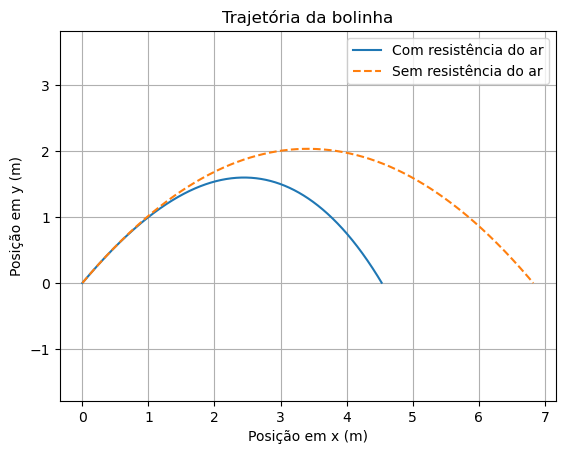

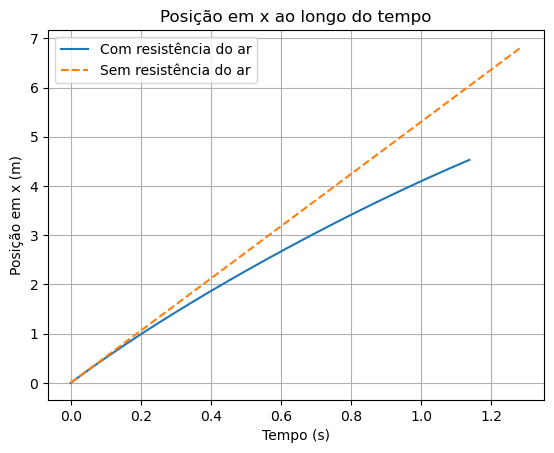

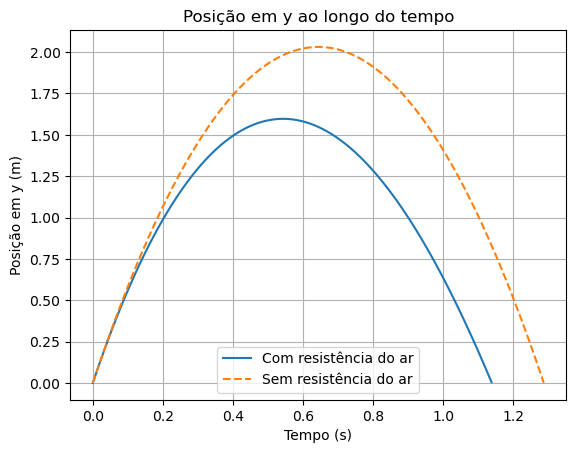

In [185]:
plt.plot(x1_list, y1_list, label="Com resistência do ar")
plt.plot(x2_list, y2_list, label="Sem resistência do ar", linestyle='--')
plt.legend()
plt.xlabel("Posição em x (m)")
plt.ylabel("Posição em y (m)")
plt.title("Trajetória da bolinha")
plt.axis('equal')
plt.grid()
plt.show()

plt.plot(t1, x1_list, label="Com resistência do ar")
plt.plot(t2, x2_list, linestyle='--', label="Sem resistência do ar")
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Posição em x (m)")
plt.title("Posição em x ao longo do tempo")
plt.grid()
plt.show()

plt.plot(t1, y1_list, label="Com resistência do ar")
plt.plot(t2, y2_list, linestyle='--', label="Sem resistência do ar")
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Posição em y (m)")
plt.title("Posição em y ao longo do tempo")
plt.grid()
plt.show()